**Citizen App Interview
Take-Home Analytical Case**
by Joydeep Chatterjee

This notebook has been created on the Kaggle website in order to take advantage of its integration with Google BigQuery.

Import necessary packages for numerical and dataframe analysis.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Increase pandas default display 
pd.options.display.max_rows = 250
pd.options.display.max_columns = 250

# Suppress scientific notation of data in pandas
pd.set_option('display.float_format', '{:.2f}'.format)

# Graphing
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
from matplotlib.legend import Legend
from matplotlib.colors import TwoSlopeNorm
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

Import dataset using Google BigQuery python package.

In [2]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "stackoverflow" dataset
dataset_ref = client.dataset("stackoverflow", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


**1. Explore the Data**

In [3]:
# Get a list of available tables 
tables = list(client.list_tables(dataset))
list_of_tables = [table.table_id for table in tables] 

# Print your answer
print(list_of_tables)

['badges', 'comments', 'post_history', 'post_links', 'posts_answers', 'posts_moderator_nomination', 'posts_orphaned_tag_wiki', 'posts_privilege_wiki', 'posts_questions', 'posts_tag_wiki', 'posts_tag_wiki_excerpt', 'posts_wiki_placeholder', 'stackoverflow_posts', 'tags', 'users', 'votes']


**2. Review Relevant Tables**

Users:

In [4]:
# Construct a reference to the "posts_answers" table
users_table_ref = dataset_ref.table("users")

# API request - fetch the table
users_table = client.get_table(users_table_ref)

# Preview the first five lines of the "posts_answers" table
client.list_rows(users_table, max_results=5).to_dataframe()

,id,display_name,about_me,age,creation_date,last_access_date,location,reputation,up_votes,down_votes,views,profile_image_url,website_url
0,119,Jesse Ezell,test,None,2008-08-02 06:16:23.953000+00:00,2014-05-19 08:08:35.100000+00:00,None,189,1,0,136,None,http://www.iserviceoriented.com
1,731,Jon Sagara,<p>I am a web application developer (currently...,None,2008-08-08 12:44:39.133000+00:00,2022-03-05 22:05:50.887000+00:00,"Roseville, CA",1050,3568,7,245,None,https://www.sagara.dev
2,1065,kokos,void,None,2008-08-12 05:47:43.717000+00:00,2013-10-23 17:13:35.220000+00:00,"Earth, TX",41786,270,100,1589,None,http://www.live.com
3,2131,DrPizza,<p>General schmuck.</p>,None,2008-08-20 13:45:48.217000+00:00,2019-05-20 15:16:39.033000+00:00,"Brooklyn, NY",17272,181,133,2315,None,http://arstechnica.com/author/peter-bright/
4,2146,Mike Haboustak,"<p>asp.net, C#, jquery, with old embedded C an...",None,2008-08-20 15:02:09.330000+00:00,2022-03-06 04:26:34.490000+00:00,"Cincinnati, OH",2226,73,12,221,https://i.stack.imgur.com/mEqTe.png,None


Questions:

In [5]:
# Construct a reference to the "posts_questions" table
questions_table_ref = dataset_ref.table("posts_questions")

# API request - fetch the table
questions_table = client.get_table(questions_table_ref)

# Preview the first five lines of the "posts_questions" table
client.list_rows(questions_table, max_results=5).to_dataframe()

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,320268,Html.ActionLink doesn’t render # properly,<p>When using Html.ActionLink passing a string...,NaN,0,0,NaT,2008-11-26 10:42:37.477000+00:00,0,2009-02-06 20:13:54.370000+00:00,NaT,None,NaN,Paulo,NaN,None,1,0,asp.net-mvc,380
1,324003,Primitive recursion,<p>how will i define the function 'simplify' ...,NaN,0,0,NaT,2008-11-27 15:12:37.497000+00:00,0,2012-09-25 19:54:40.597000+00:00,2012-09-25 19:54:40.597000+00:00,Marcin,1288.00,None,41000.00,None,1,0,haskell|lambda|functional-programming|lambda-c...,488
2,390605,While vs. Do While,<p>I've seen both the blocks of code in use se...,390608.00,0,0,NaT,2008-12-24 01:49:54.230000+00:00,2,2008-12-24 03:08:55.897000+00:00,NaT,None,NaN,Unkwntech,115.00,None,1,0,language-agnostic|loops,11086
3,413246,Protect ASP.NET Source code,<p>Im currently doing some research in how to ...,NaN,0,0,NaT,2009-01-05 14:23:51.040000+00:00,0,2009-03-24 21:30:22.370000+00:00,2009-01-05 14:42:28.257000+00:00,Tom Anderson,13502.00,Velnias,NaN,None,1,0,asp.net|deployment|obfuscation,4811
4,454921,"Difference between ""int[] myArray"" and ""int my...",<blockquote>\n <p><strong>Possible Duplicate:...,454928.00,0,0,NaT,2009-01-18 10:22:52.177000+00:00,0,2009-01-18 10:30:50.930000+00:00,2017-05-23 11:49:26.567000+00:00,None,-1.00,Evan Fosmark,49701.00,None,1,0,java|arrays,795


Answers:

In [6]:
# Construct a reference to the "posts_answers" table
answers_table_ref = dataset_ref.table("posts_answers")

# API request - fetch the table
answers_table = client.get_table(answers_table_ref)

# Preview the first five lines of the "posts_answers" table
client.list_rows(answers_table, max_results=5).to_dataframe()

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,last_edit_date,last_editor_display_name,last_editor_user_id,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count
0,18,None,<p>For a table like this:</p>\n\n<pre><code>CR...,None,None,2,NaT,2008-08-01 05:12:44.193000+00:00,None,2016-06-02 05:56:26.060000+00:00,2016-06-02 05:56:26.060000+00:00,Jeff Atwood,126039,phpguy,NaN,17,2,59,None,None
1,165,None,"<p>You can use a <a href=""http://sharpdevelop....",None,None,0,NaT,2008-08-01 18:04:25.023000+00:00,None,2019-04-06 14:03:51.080000+00:00,2019-04-06 14:03:51.080000+00:00,None,1721793,user2189331,NaN,145,2,10,None,None
2,1028,None,<p>The VB code looks something like this:</p>\...,None,None,0,NaT,2008-08-04 04:58:40.300000+00:00,None,2013-02-07 13:22:14.680000+00:00,2013-02-07 13:22:14.680000+00:00,None,395659,user2189331,NaN,947,2,8,None,None
3,1073,None,<p>My first choice would be a dedicated heap t...,None,None,0,NaT,2008-08-04 07:51:02.997000+00:00,None,2015-09-01 17:32:32.120000+00:00,2015-09-01 17:32:32.120000+00:00,None,45459,user2189331,NaN,1069,2,29,None,None
4,1260,None,<p>I found the answer. all you have to do is a...,None,None,0,NaT,2008-08-04 14:06:02.863000+00:00,None,2016-12-20 08:38:48.867000+00:00,2016-12-20 08:38:48.867000+00:00,None,1221571,Jin,NaN,1229,2,1,None,None


**3. Preliminary Questions**

a. How many new users have been joining Stack Overflow throughout the years?

In [7]:
# Since there are not enough data points for 2022, that year has been omitted
users_new_query = """
                  SELECT EXTRACT(YEAR FROM creation_date) AS year, COUNT(1) AS num_users_new
                  FROM `bigquery-public-data.stackoverflow.users`
                  WHERE EXTRACT(YEAR FROM creation_date) < 2022
                  GROUP BY year
                  ORDER BY year ASC
                  """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
users_new_query_job = client.query(users_new_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
users_new_results = users_new_query_job.to_dataframe()

# Create column for cumulative number of users
users_new_results['tot_users'] = users_new_results['num_users_new'].cumsum()

# Preview results
print(users_new_results)

    year  num_users_new  tot_users
0   2008          21640      21640
1   2009          77984      99624
2   2010         199163     298787
3   2011         358656     657443
4   2012         678648    1336091
5   2013        1122049    2458140
6   2014        1174270    3632410
7   2015        1251842    4884252
8   2016        1514766    6399018
9   2017        1725694    8124712
10  2018        1643340    9768052
11  2019        1717338   11485390
12  2020        2200867   13686257
13  2021        2792185   16478442


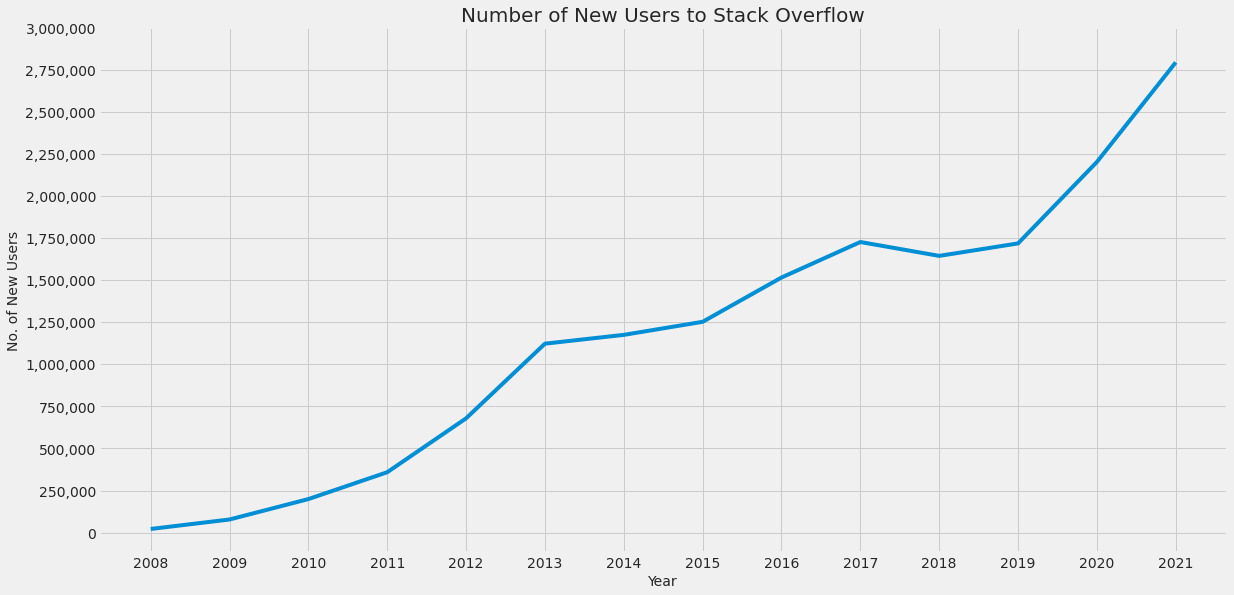

In [8]:
# Creating seaborn lineplot
plt.figure(figsize=(18,9))
g = sns.lineplot(x = users_new_results.year,
                 y = 'num_users_new',
                 data = users_new_results)

# Plot formatting
g.set_yticks(list(range(0,3250000,250000)))
g.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
g.set_xticks(list(range(2008,2022,1)))
plt.title('Number of New Users to Stack Overflow', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('No. of New Users', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

From the founding of the website in 2008 to 2013, there is has been a quadratic increase in the number of new users. From 2013 to 2015, the growth has been stagnant, then accelerated from 2015 to 2017 before slumping for in 2018 and then regaining in 2019. From 2019 to 2021 was a sharp spike in the growth of new users.

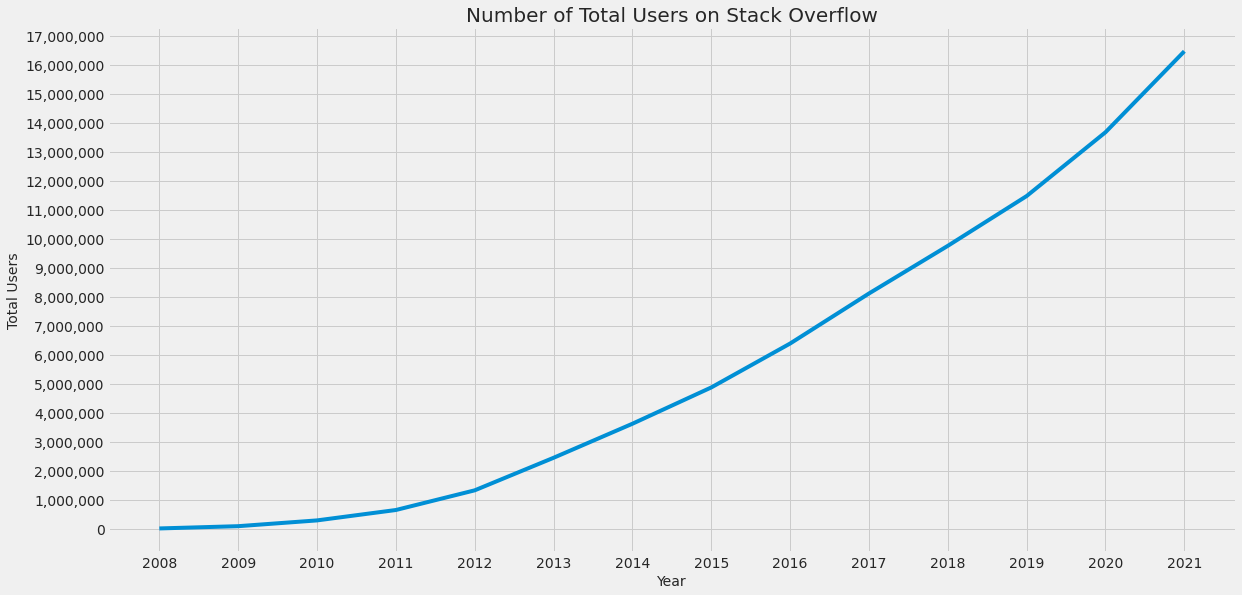

In [9]:
# Creating seaborn lineplot
plt.figure(figsize=(18,9))
g = sns.lineplot(x = users_new_results.year,
                 y = 'tot_users',
                 data = users_new_results)

# Plot formatting
g.set_yticks(list(range(0,18000000,1000000)))
g.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
g.set_xticks(list(range(2008,2022,1)))
plt.title('Number of Total Users on Stack Overflow', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Users', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Despite the erratic patterns of new user growth to Stack Overflow, there has overall been a steady exponential growth in the number of its total users. This still does not explain the stagnation of activity after 2014.

b. How many questions have been asked throughout the years?

In [10]:
# Since there are not enough data points for 2022, that year has been omitted
questions_query = """
                  SELECT EXTRACT(YEAR FROM creation_date) AS year, COUNT(1) AS questions
                  FROM `bigquery-public-data.stackoverflow.posts_questions`
                  WHERE EXTRACT(YEAR FROM creation_date) < 2022
                  GROUP BY year
                  ORDER BY year ASC
                  """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
questions_query_job = client.query(questions_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
questions_results = questions_query_job.to_dataframe()

# Create column for cumulative number of users
questions_results['tot_questions'] = questions_results['questions'].cumsum()

# Preview results
print(questions_results)

    year  questions  tot_questions
0   2008      57755          57755
1   2009     342050         399805
2   2010     691449        1091254
3   2011    1191023        2282277
4   2012    1630810        3913087
5   2013    2038409        5951496
6   2014    2141890        8093386
7   2015    2198514       10291900
8   2016    2202647       12494547
9   2017    2118252       14612799
10  2018    1891231       16504030
11  2019    1769797       18273827
12  2020    1876708       20150535
13  2021    1822824       21973359


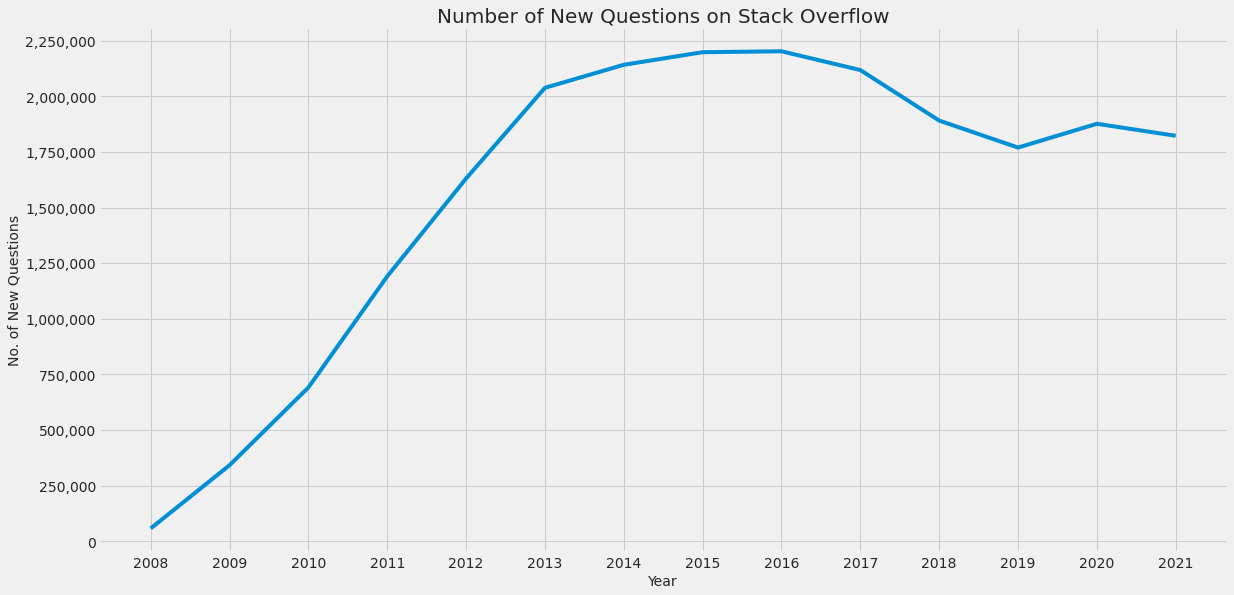

In [11]:
# Creating seaborn lineplot
plt.figure(figsize=(18,9))
g = sns.lineplot(x = questions_results.year,
                 y = 'questions',
                 data = questions_results)

# Plot formatting
g.set_yticks(list(range(0,2500000,250000)))
g.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
g.set_xticks(list(range(2008,2022,1)))
plt.title('Number of New Questions on Stack Overflow', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('No. of New Questions', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Despite the overall steady growth of the number of users on Stack Overflow, the number of new questions posted steadily grew from 2008 to 2013 in lockstep with that growth. However, after 2013 there was a stagnant growth in the number of new questions asked, peaking between 2015 to 2016 and then slowly declining as an overall pattern.

c. How many answers to questions have been contributed throughout the years?

In [12]:
# Since there are not enough data points for 2022, that year has been omitted
answers_query = """
                  SELECT EXTRACT(YEAR FROM creation_date) AS year, COUNT(1) AS answers
                  FROM `bigquery-public-data.stackoverflow.posts_answers`
                  WHERE EXTRACT(YEAR FROM creation_date) < 2022
                  GROUP BY year
                  ORDER BY year ASC
                  """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
answers_query_job = client.query(answers_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
answers_results = answers_query_job.to_dataframe()

# Create column for cumulative number of users
answers_results['tot_answers'] = answers_results['answers'].cumsum()

# Preview results
print(answers_results)

    year  answers  tot_answers
0   2008   211257       211257
1   2009   934545      1145802
2   2010  1458782      2604584
3   2011  2266467      4871051
4   2012  2826166      7697217
5   2013  3318779     11015996
6   2014  3199651     14215647
7   2015  3146217     17361864
8   2016  3074946     20436810
9   2017  2906866     23343676
10  2018  2555891     25899567
11  2019  2400207     28299774
12  2020  2449705     30749479
13  2021  2014716     32764195


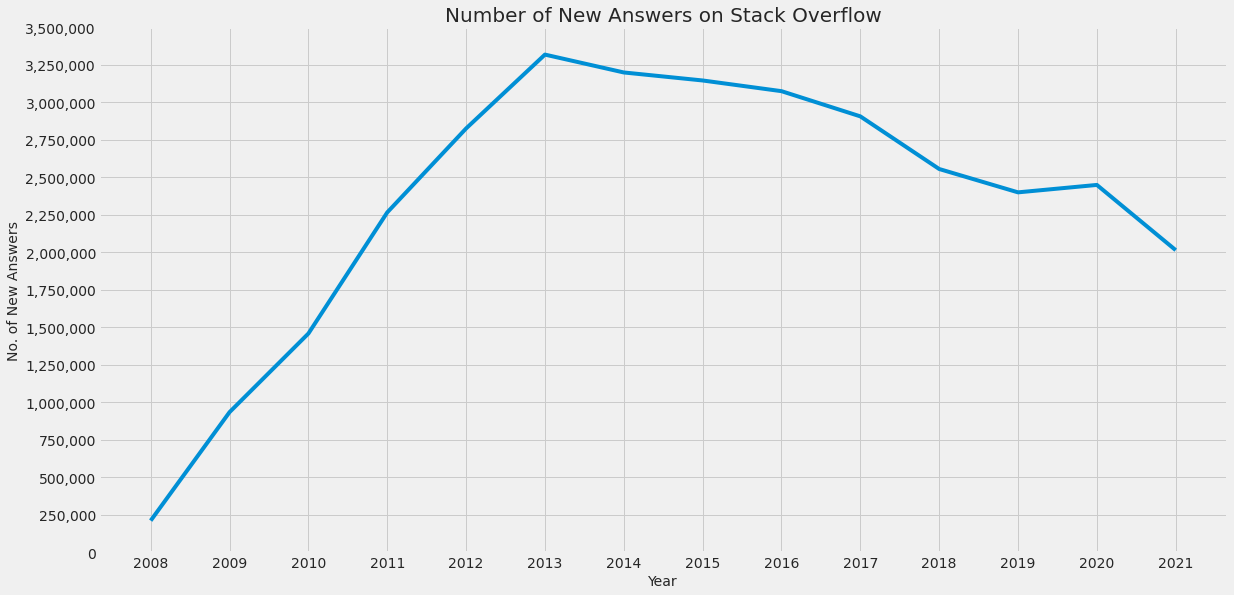

In [13]:
# Creating seaborn lineplot
plt.figure(figsize=(18,9))
g = sns.lineplot(x = answers_results.year,
                 y = 'answers',
                 data = answers_results)

# Plot formatting
g.set_yticks(list(range(0,3750000,250000)))
g.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
g.set_xticks(list(range(2008,2022,1)))
plt.title('Number of New Answers on Stack Overflow', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('No. of New Answers', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Likewise, the numbers of answers posted by users followed the same pattern as that for those posting questions, but 2013 was a critical year in which the upward trajectory reversed to kick off a slow decline in site activity on that end as well.

**4. Preliminary Conclusions**

Despite the steady growth in the number of total users on Stack Overflow, 2013 was a critical year in which the actual user activity in terms of questions asked and answers provided began a sudden downturn. Clearly the user growth is not positively correlated with the number site activity by that point. In order to understand this key change in user behavior, it would be helpful to understand the user base more.

**5. Deeper Questions**

a. How long have most users been active since they first signed up?

In [14]:
# Since there are not enough data points for 2022, that year has been omitted
users_act_query = """
                  SELECT EXTRACT(YEAR FROM last_access_date) - EXTRACT(YEAR FROM creation_date) AS years_active,
                  COUNT(1) AS num_users_active
                  FROM `bigquery-public-data.stackoverflow.users`
                  WHERE EXTRACT(YEAR FROM creation_date) < 2022
                  GROUP BY years_active
                  ORDER BY years_active ASC
                  """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
users_act_query_job = client.query(users_act_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
users_act_results = users_act_query_job.to_dataframe()

# Preview results
print(users_act_results)

    years_active  num_users_active
0              0           8804482
1              1           2990466
2              2           1226700
3              3            809161
4              4            628050
5              5            508318
6              6            404856
7              7            322502
8              8            261615
9              9            210218
10            10            142412
11            11             86350
12            12             47770
13            13             26548
14            14              8994


In [15]:
users_act_results.num_users_active.dtypes

dtype('int64')

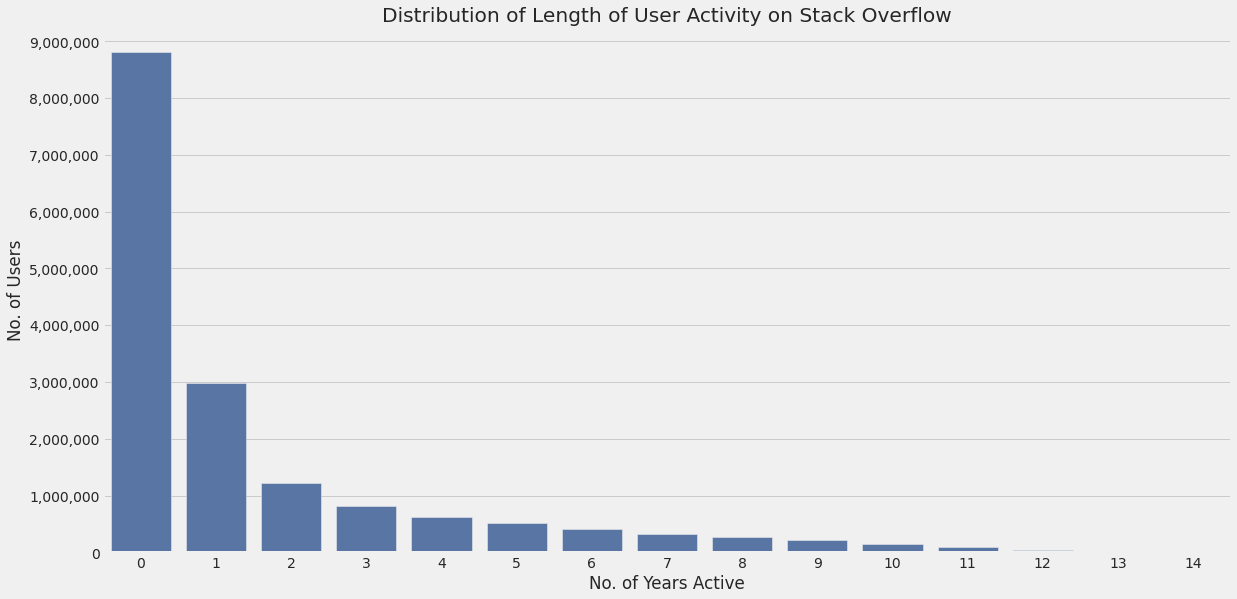

In [16]:
# Creating seaborn countplot
plt.figure(figsize=(18,9))
g = sns.barplot(x = users_act_results.years_active, y = 'num_users_active', data = users_act_results, color = '#4c72b0')

# Plot formatting
g.set_yticks(list(range(0,10000000,1000000)))
g.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
g.set_xticks(list(range(0,15,1)))
plt.title('Distribution of Length of User Activity on Stack Overflow')
plt.xlabel('No. of Years Active')
plt.ylabel('No. of Users')
plt.show()

The overwhelming majority of users have been active for less than a year since signing up. The number of users that have lasted even one year is only a third of that, and those that have lasted two years is even a third of the previous number. Afterwards, the number of users that are active past a certain year tends to decline slowly until almost nonexistent, in comparison to the overall user base.

b. How has the average number of years that users have stayed active changed throughout the years?

In [17]:
## Since there are not enough data points for 2022, that year has been omitted
users_tot_query = """
                  WITH users_act_per_year AS
                  (
                  SELECT EXTRACT(YEAR FROM last_access_date) AS year,
                  EXTRACT(YEAR FROM last_access_date) - EXTRACT(YEAR FROM creation_date) AS years_active,
                  COUNT(2) AS num_active_users
                  FROM `bigquery-public-data.stackoverflow.users`
                  WHERE EXTRACT(YEAR FROM creation_date) < 2022 and EXTRACT(YEAR FROM last_access_date) < 2022
                  GROUP BY year, years_active
                  ORDER BY year, years_active ASC
                  )
                  SELECT year, SUM(years_active * num_active_users) / SUM(num_active_users) AS avg_user_active, 
                  FROM users_act_per_year
                  GROUP BY year
                  ORDER BY year ASC
                  """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
users_tot_query_job = client.query(users_tot_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
users_tot_results = users_tot_query_job.to_dataframe()

# Preview results
print(users_tot_results)

    year  avg_user_active
0   2008             0.00
1   2009             0.10
2   2010             0.11
3   2011             0.18
4   2012             0.19
5   2013             0.26
6   2014             0.44
7   2015             0.61
8   2016             0.59
9   2017             0.75
10  2018             1.05
11  2019             1.23
12  2020             1.38
13  2021             1.52


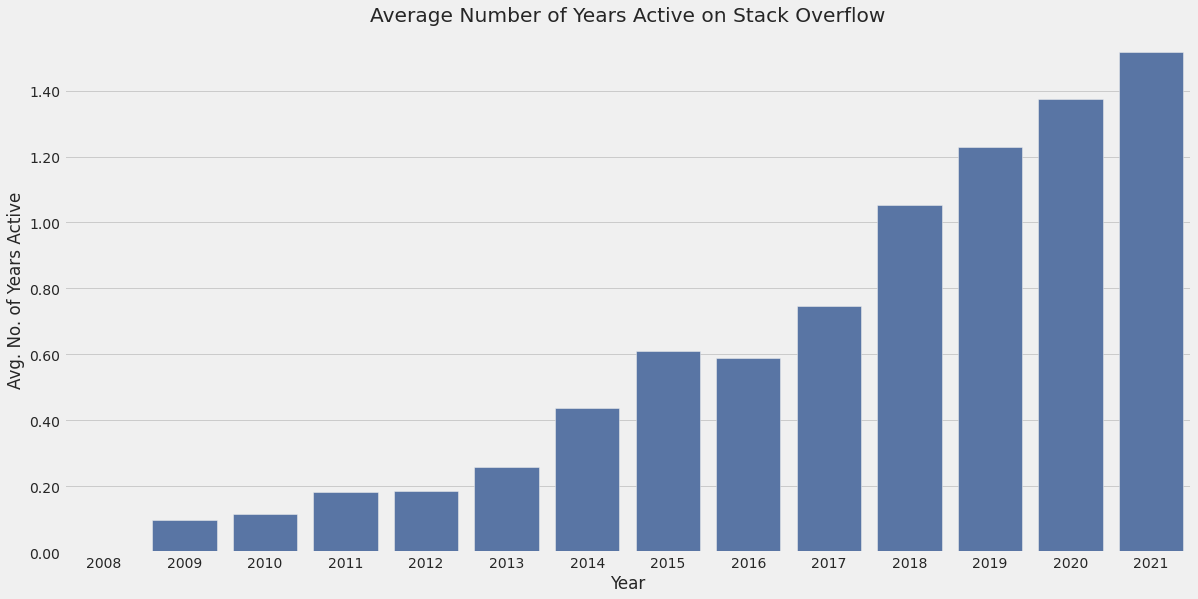

In [18]:
# Creating seaborn countplot
plt.figure(figsize=(18,9))
g = sns.barplot(x = users_tot_results.year, y = 'avg_user_active', data = users_tot_results, color = '#4c72b0')

# Plot formatting
g.yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
plt.title('Average Number of Years Active on Stack Overflow')
plt.xlabel('Year')
plt.ylabel('Avg. No. of Years Active')
plt.show()

Again, 2013 is the critical year in which the average number of years that a user has been active on Stack Overflow suddenly rose, signalling that the website seems to have lost its appeal among casual users (defined as those who have not been active more than one year) and became the domain of more long-term dedicated users. There must have been a change in possibly the user policy or business model of Stack Exchange to have caused this alienation for casual users. It appears that most users that signed up for an account only used it temporarily before ceasing all further activity on it.

**6. Final Conclusion**

At this point in the study, it is logical to conclude that there must have been a particular event or controversy that slowed the growth of activity on the website as a result of having alienated casual users that could have become dedicated users. More users do not necessarily equal more activity, since it is possible that majority of the users could have just created an account to ask a specific question and left once satisfied, or may have found alternatives for technical assistance. Otherwise, the users that have been dedicated to this website did not mind whatever major change in 2013 occurred to have sharply slowed down activity.